# Heart Attack Analysis & Prediction

## What will you learn from this project?
* EDA
* Missing Value Analysis
* Categoric and Numeric Features
* Standardization
* Box - Swarm - Cat - Correlation Plot Analysis
* Outlier Detection
* Modelling and Tuning Machine Learning Model 

## Introduction
* A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood. 
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle. 
* Coronary artery disease (CAD) is the main cause of heart attack.

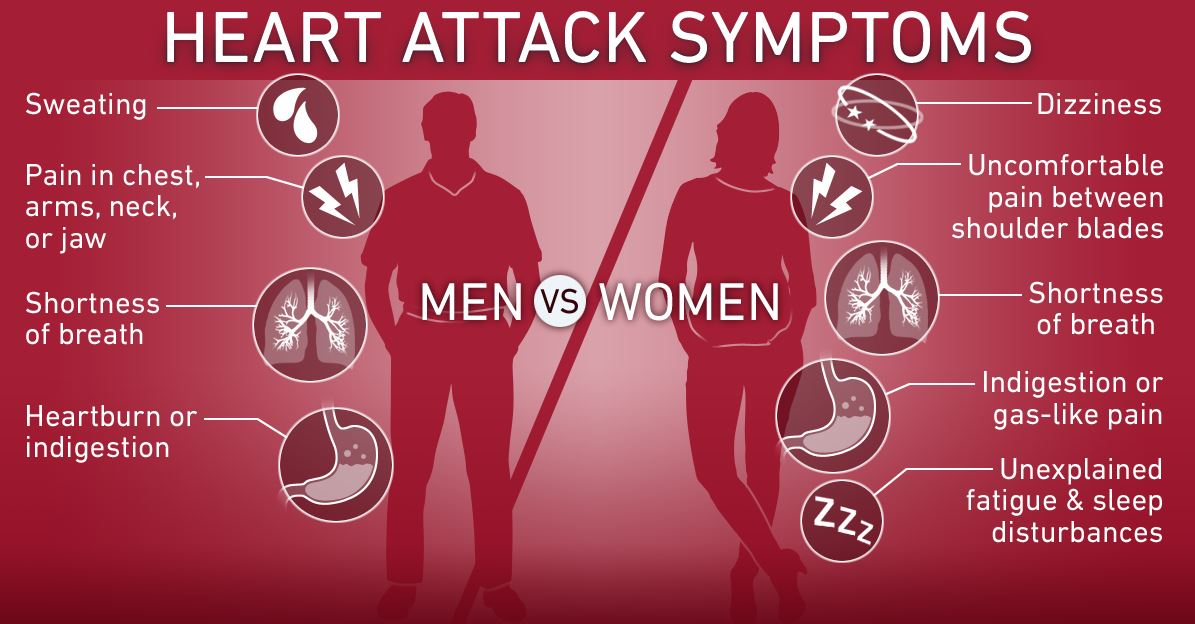

## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyse Data](#3)
1. [Missing Value Analysis](#4)
1. [Unique Value Analysis](#5)
1. [Categorical Feature Analysis](#6)
1. [Numeric Feature Analysis](#7)
1. [Standardization](#8)
1. [Box Plot Analysis](#9)
1. [Swarm Plot Analysis](#10)
1. [Cat Plot Analysis](#11)
1. [Correlation Analysis](#12)
1. [Outlier Detection](#13)
1. [Modelling](#14)
    1. Encoding Categorical Columns
    1. Scaling
    1. Train/Test Split
    1. Logistic Regression
    1. Logistic Regression Hyperparameter Tuning
1. [Conclusion](#15)

<a id="1"></a>
## Python Libraries
* In this section, we import used libraries during this kernel.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, roc_curve, classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## Data Content
* **Age:** Age of the patient
* **Sex:** Sex of the patient
* **exang:** exercise induced angina (1 = yes; 0 = no)
* **ca:** number of major vessels (0-3)
* **cp:** Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* **trtbps:** resting blood pressure (in mm Hg)
* **chol:** cholestoral in mg/dl fetched via BMI sensor
* **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **rest_ecg:** resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach:** maximum heart rate achieved
* **target:** 0= less chance of heart attack 1= more chance of heart attack

<a id="3"></a>
## Read and Analyse Data
* In this section, we read heart.csv

In [2]:
# read data 
df = pd.read_csv("heart6.csv", na_values = "?")

# Drop rows with any missing values
df = df.dropna()


In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,43.0,1.0,0.0,115,303.0,0.0,1.0,181.0,0,1.2,1.0,0.0,2.0,1.0
1,62.0,0.0,0.0,124,209.0,0.0,1.0,163.0,0,0.0,2.0,0.0,2.0,1.0
2,50.0,1.0,0.0,150,243.0,0.0,0.0,128.0,0,2.6,1.0,0.0,3.0,0.0
3,54.0,0.0,1.0,132,288.0,1.0,0.0,159.0,1,0.0,2.0,1.0,2.0,1.0
5,52.0,1.0,1.0,134,201.0,0.0,1.0,158.0,0,0.8,2.0,1.0,2.0,1.0


In [4]:
# describe basic statistics of data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 321
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalachh  303 non-null    float64
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    float64
 11  caa       303 non-null    float64
 12  thall     303 non-null    float64
 13  output    303 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 35.5 KB


<a id="4"></a>
## Missing Value Analysis

In [6]:
# missing value
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<a id="5"></a>
## Unique Value Analysis

In [7]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


<a id="6"></a>
## Categorical Feature Analysis

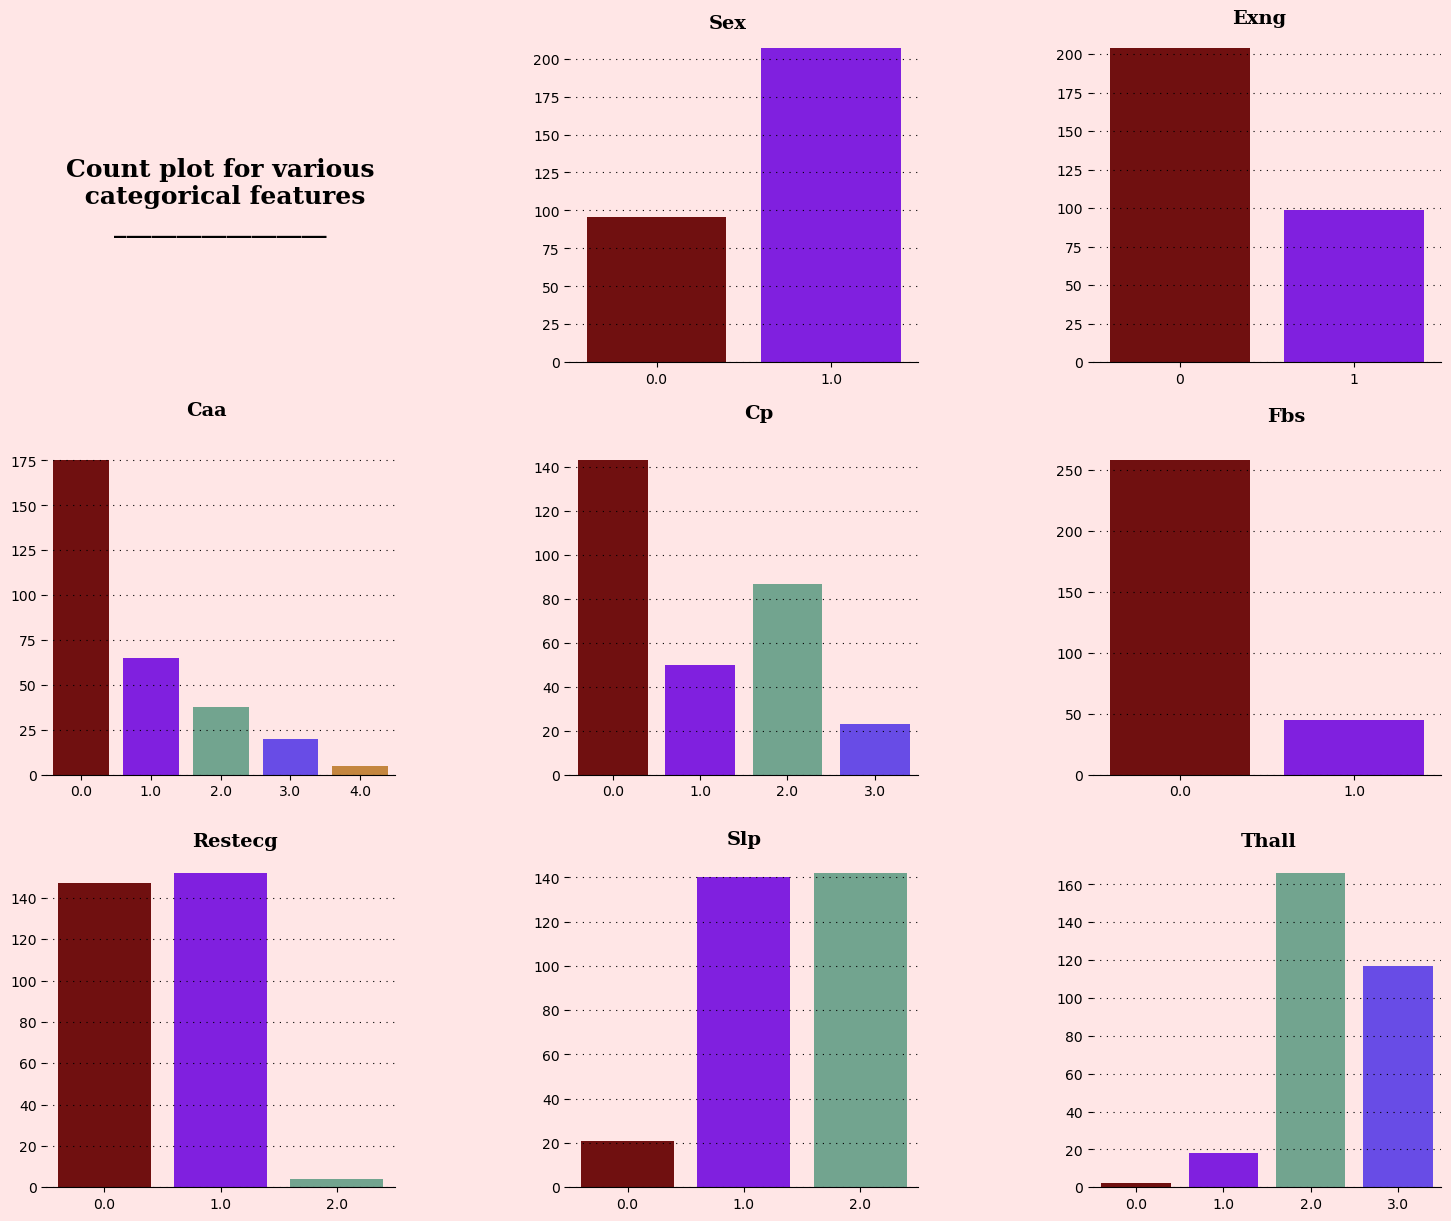

In [8]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

<a id="7"></a>
## Numeric Feature Analysis
* Bivariate data analysis with scatter plot

In [9]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]

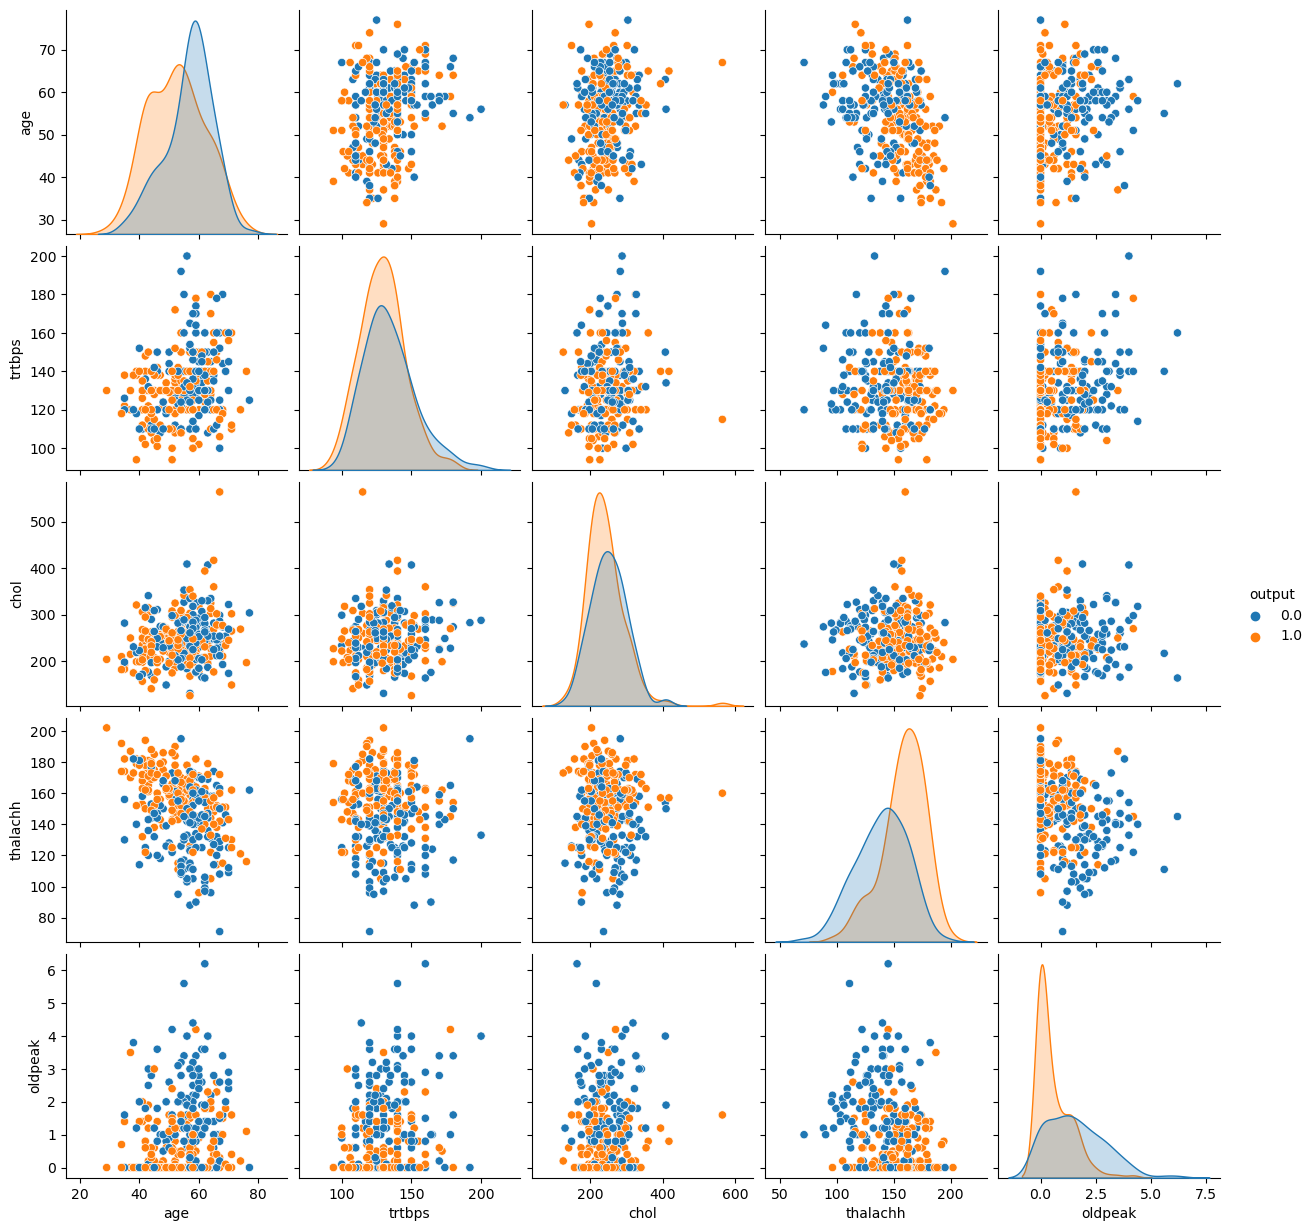

In [10]:
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

<a id="8"></a>
## Standardization

In [11]:
scaler = StandardScaler()
scaler

StandardScaler()

In [12]:
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])

In [13]:
scaled_array 

array([[-1.25357993, -0.94943134,  1.09645005,  1.37108844,  0.13837295],
       [ 0.84190778, -0.43541521, -0.72014528,  0.58393935, -0.89686172],
       [-0.48155814,  1.04952029, -0.06307888, -0.94662832,  1.34614673],
       ...,
       [-2.24617937, -0.77809263, -1.2419333 ,  1.0649749 , -0.89686172],
       [ 0.29046364, -0.43541521,  0.2847798 , -0.37813176, -0.63805305],
       [-1.03300228,  0.59261706,  1.21240295, -0.11574873, -0.89686172]])

In [14]:
# pd.DataFrame(scaled_array).describe()

<a id="9"></a>
## Box Plot Analysis

In [15]:
df_dummy = pd.DataFrame(scaled_array, columns = numeric_list[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,-1.253580,-0.949431,1.096450,1.371088,0.138373
1,0.841908,-0.435415,-0.720145,0.583939,-0.896862
2,-0.481558,1.049520,-0.063079,-0.946628,1.346147
3,-0.040403,0.021488,0.806568,0.409017,-0.896862
4,-0.260980,0.135714,-0.874749,0.365287,-0.206705


In [16]:
df_dummy = pd.concat([df_dummy, df.loc[:, "output"]], axis = 1)
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,-1.253580,-0.949431,1.096450,1.371088,0.138373,1.0
1,0.841908,-0.435415,-0.720145,0.583939,-0.896862,1.0
2,-0.481558,1.049520,-0.063079,-0.946628,1.346147,0.0
3,-0.040403,0.021488,0.806568,0.409017,-0.896862,1.0
4,-0.260980,0.135714,-0.874749,0.365287,-0.206705,NaN


In [17]:
data_melted = pd.melt(df_dummy, id_vars = "output", var_name = "features", value_name = "value")
data_melted.head(20)

,output,features,value
0,1.0,age,-1.253580
1,1.0,age,0.841908
2,0.0,age,-0.481558
3,1.0,age,-0.040403
4,NaN,age,-0.260980
5,1.0,age,-0.481558
6,1.0,age,-1.474158
7,1.0,age,0.621330
8,0.0,age,-0.260980
9,0.0,age,1.062485


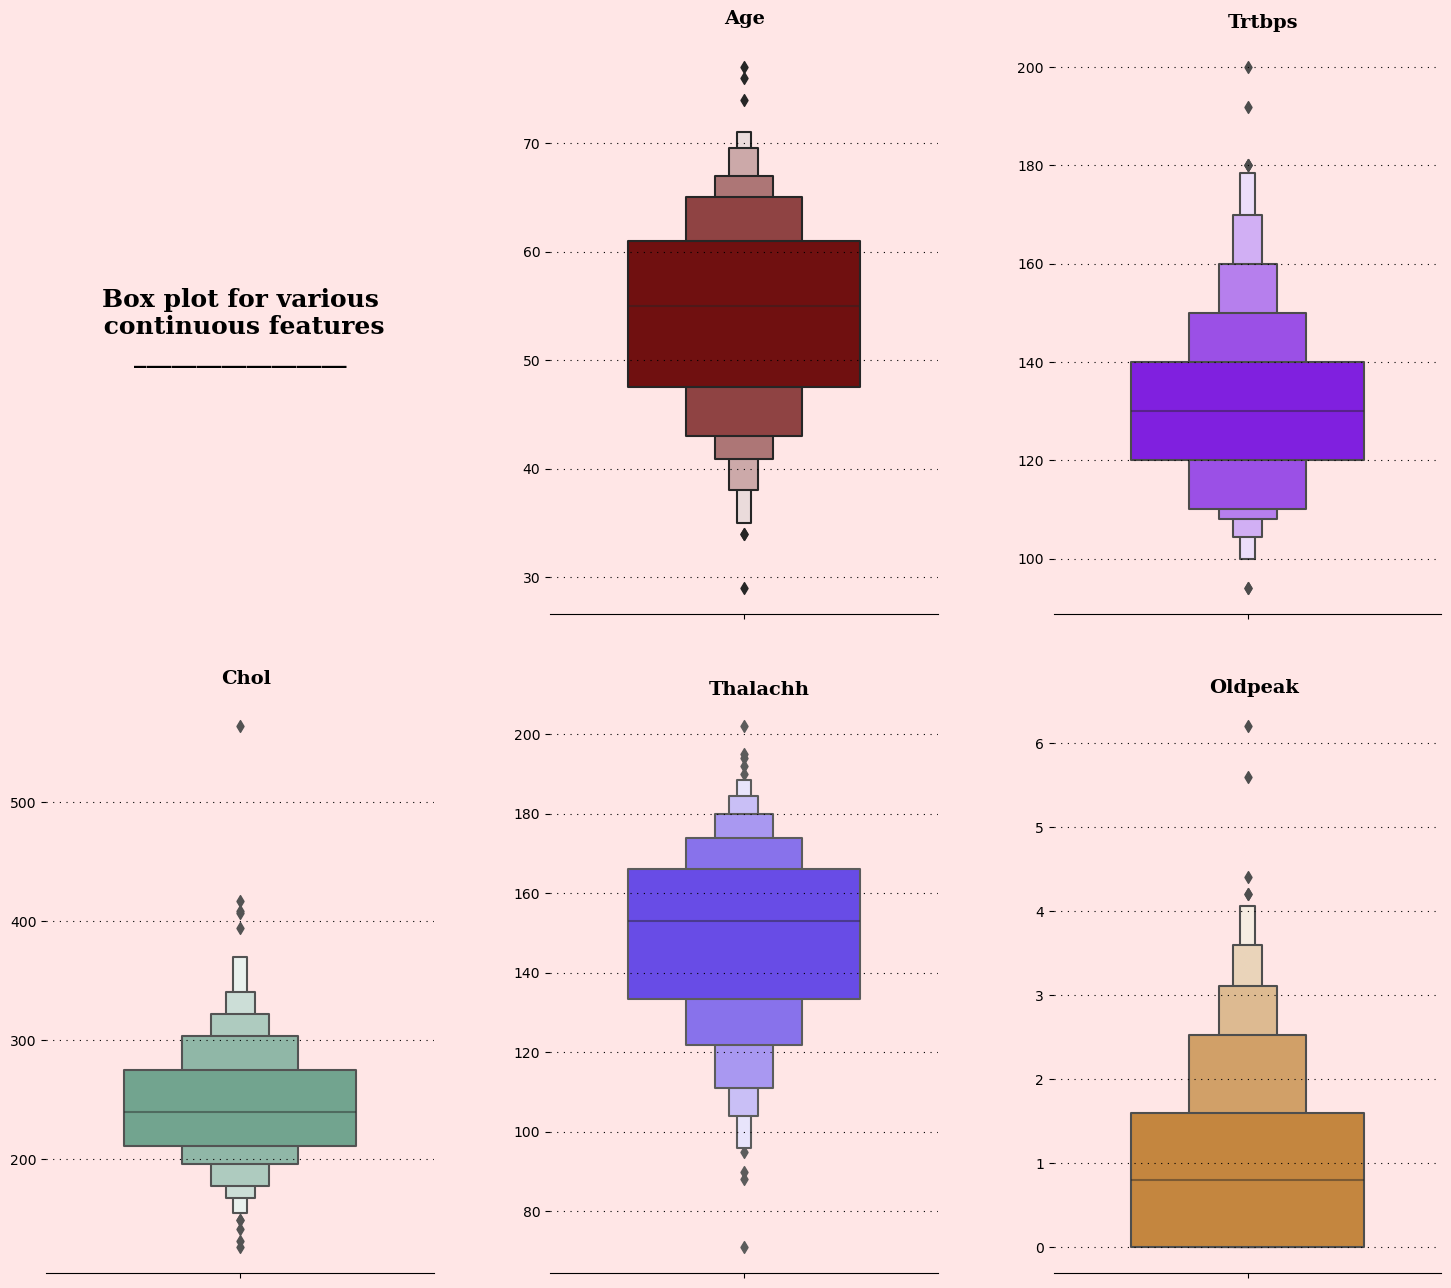

In [18]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Box plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps 
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol 
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh 
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

<a id="10"></a>
## Swarm Plot Analysis

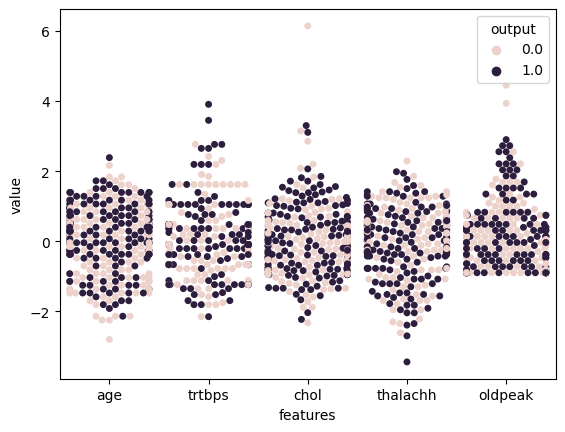

In [19]:
# swarm plot
plt.figure()
sns.swarmplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

<a id="11"></a>
## Cat Plot Analysis

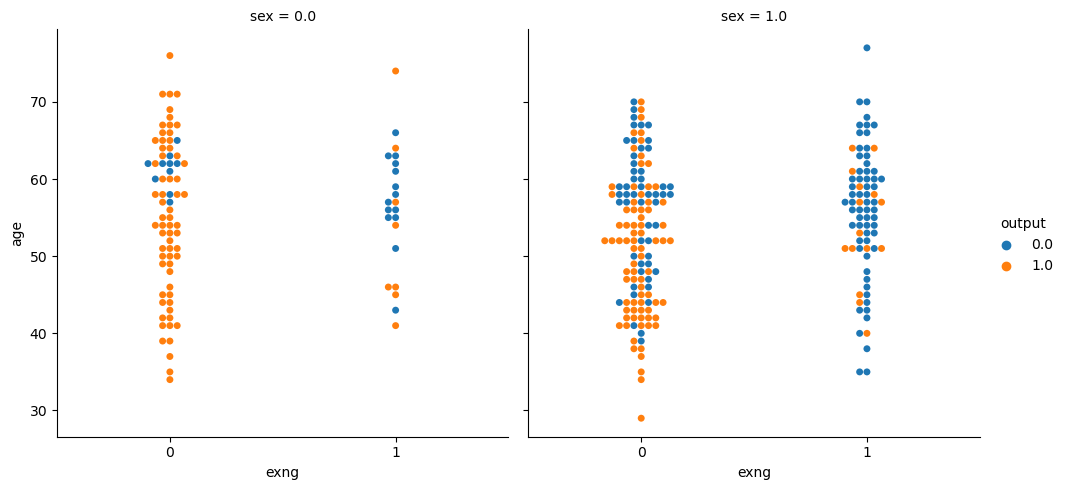

In [20]:
sns.catplot(x = "exng", y = "age", hue = "output", col = "sex", kind = "swarm", data = df)
plt.show()

<a id="12"></a>
## Correlation Analysis

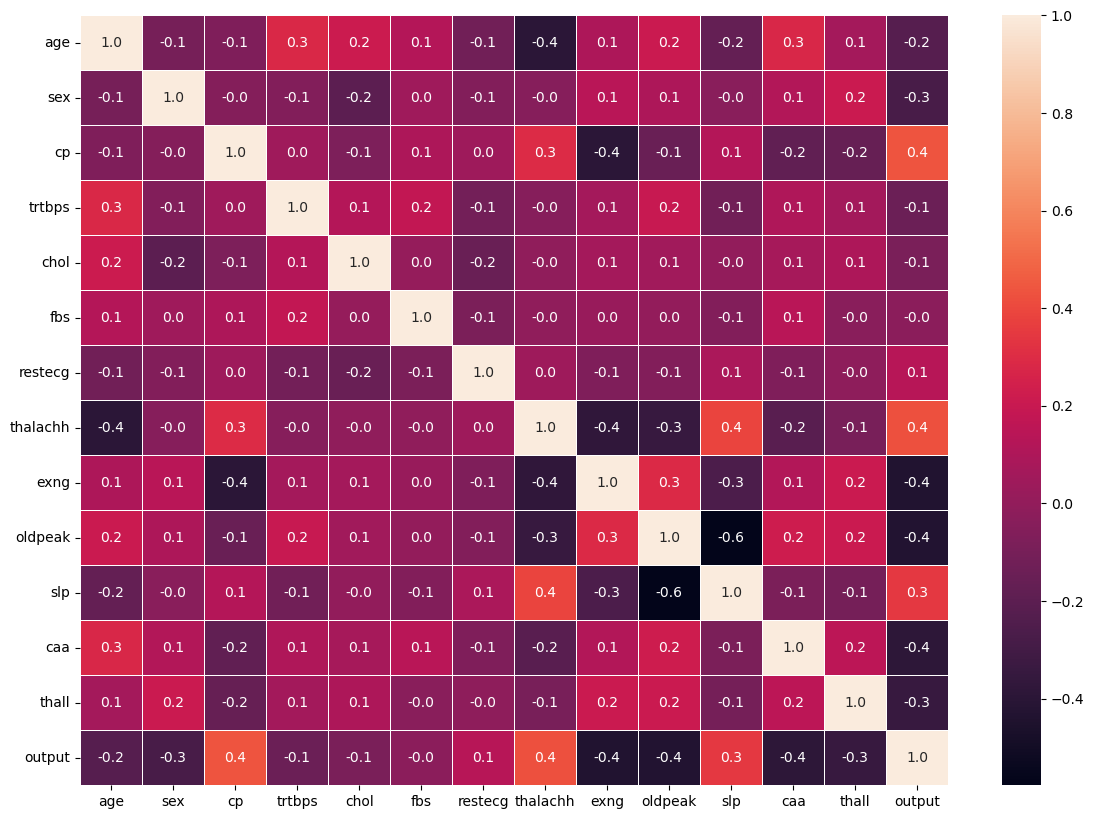

In [21]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

<a id="13"></a>
## Outlier Detection
* Outliers can disrupt ML process.
* 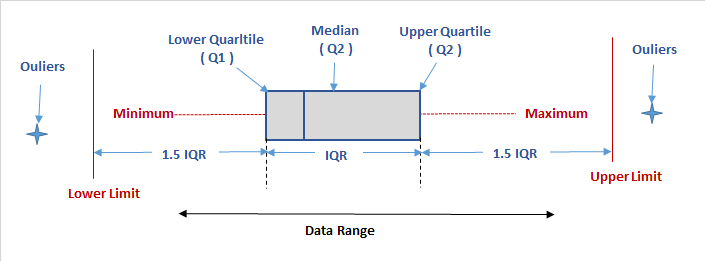

In [22]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,43.0,115,303.0,181.0,1.2
1,62.0,124,209.0,163.0,0.0
2,50.0,150,243.0,128.0,2.6
3,54.0,132,288.0,159.0,0.0
5,52.0,134,201.0,158.0,0.8


In [23]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
# outlier detection
for i in numeric_list:
    
    # IQR
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", df.loc[:, i].shape)
    
    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))
    
    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", df.shape)

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (303, 14)
Old shape:  (303,)
(array([ 94, 208]),) -- (array([], dtype=int64),)
New shape:  (301, 14)
Old shape:  (301,)
(array([251]),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([154, 285]),) -- (array([], dtype=int64),)
New shape:  (298, 14)


<a id="14"></a>
## Modelling

In [25]:
df1 = df.copy()

### Encoding Categorical Columns
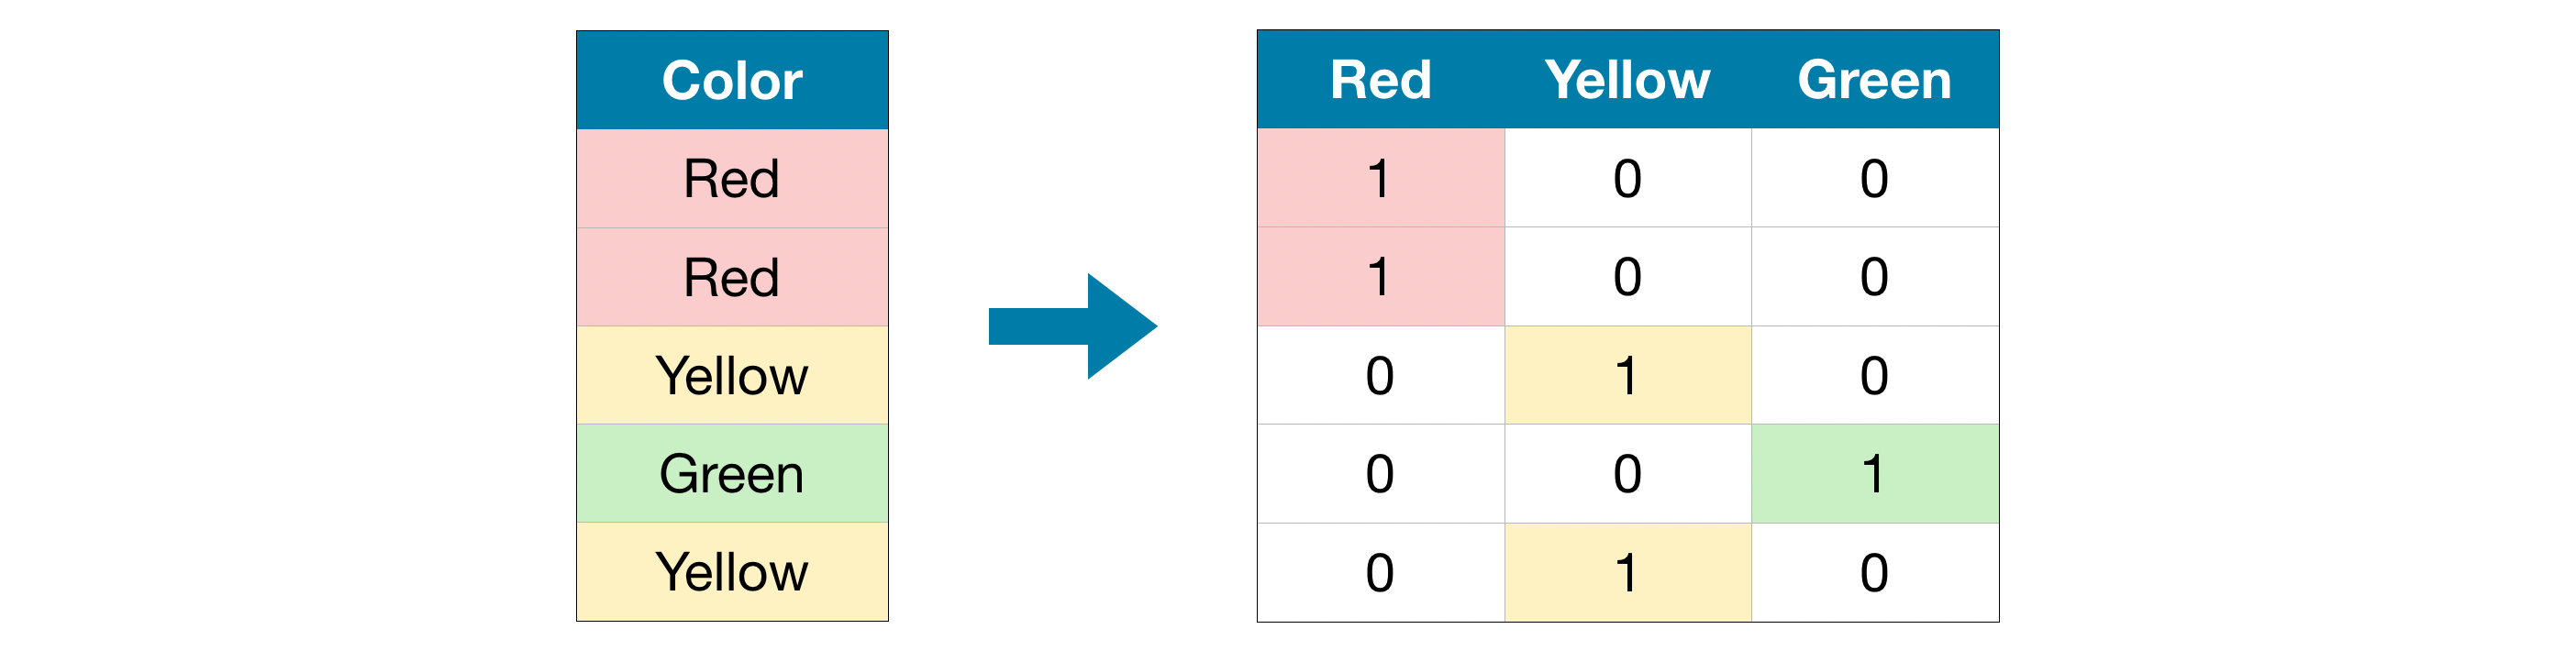

In [26]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]
df1 = pd.get_dummies(df1, columns = categorical_list[:-1], drop_first = True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,exng_1,slp_1.0,slp_2.0,caa_1.0,caa_2.0,caa_3.0,caa_4.0,thall_1.0,thall_2.0,thall_3.0
0,43.0,115,303.0,181.0,1.2,1.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,62.0,124,209.0,163.0,0.0,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,50.0,150,243.0,128.0,2.6,0.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,54.0,132,288.0,159.0,0.0,1.0,0,1,0,0,...,1,0,1,1,0,0,0,0,1,0
5,52.0,134,201.0,158.0,0.8,1.0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0


In [27]:
# 
X = df1.drop(["output"], axis = 1)
y = df1[["output"]]

### Scaling

In [28]:
scaler = StandardScaler()
scaler

StandardScaler()

In [29]:
X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1.0,cp_1.0,cp_2.0,cp_3.0,fbs_1.0,...,exng_1,slp_1.0,slp_2.0,caa_1.0,caa_2.0,caa_3.0,caa_4.0,thall_1.0,thall_2.0,thall_3.0
0,-1.249001,-0.939585,1.102000,1.371417,1.2,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0.850092,-0.424991,-0.714157,0.587750,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,-0.475651,1.061614,-0.057249,-0.936047,2.6,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,-0.033737,0.032426,0.812187,0.413602,0.0,0,1,0,0,1,...,1,0,1,1,0,0,0,0,1,0
5,-0.254694,0.146780,-0.868724,0.370065,0.8,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0


### Train/Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (268, 22)
X_test: (30, 22)
y_train: (268, 1)
y_test: (30, 1)


### Logistic Regression 

In [31]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [32]:
# fitting = training
logreg.fit(X_train, y_train)

LogisticRegression()

In [33]:
# calculate probabilities
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

array([[0.07398897, 0.92601103],
       [0.2243618 , 0.7756382 ],
       [0.69929299, 0.30070701],
       [0.02441242, 0.97558758],
       [0.26353937, 0.73646063],
       [0.82036078, 0.17963922],
       [0.19190654, 0.80809346],
       [0.05145628, 0.94854372],
       [0.01171057, 0.98828943],
       [0.9691052 , 0.0308948 ],
       [0.94923976, 0.05076024],
       [0.63664375, 0.36335625],
       [0.95452927, 0.04547073],
       [0.33934499, 0.66065501],
       [0.62844991, 0.37155009],
       [0.96503662, 0.03496338],
       [0.54339722, 0.45660278],
       [0.97505245, 0.02494755],
       [0.13858948, 0.86141052],
       [0.81813389, 0.18186611],
       [0.93300719, 0.06699281],
       [0.84671981, 0.15328019],
       [0.26361987, 0.73638013],
       [0.00501655, 0.99498345],
       [0.68799427, 0.31200573],
       [0.99411526, 0.00588474],
       [0.97949812, 0.02050188],
       [0.07742646, 0.92257354],
       [0.04750375, 0.95249625],
       [0.50256565, 0.49743435]])

In [34]:
y_pred = np.argmax(y_pred_prob, axis = 1)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0])

In [35]:
#dummy_ = pd.DataFrame(y_pred_prob)
#dummy_["y_pred"] = y_pred
#dummy_.head()

In [36]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.7666666666666667


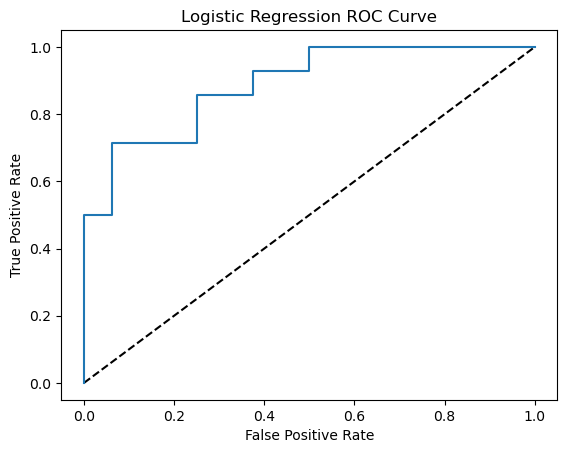

In [37]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
# plot curve
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

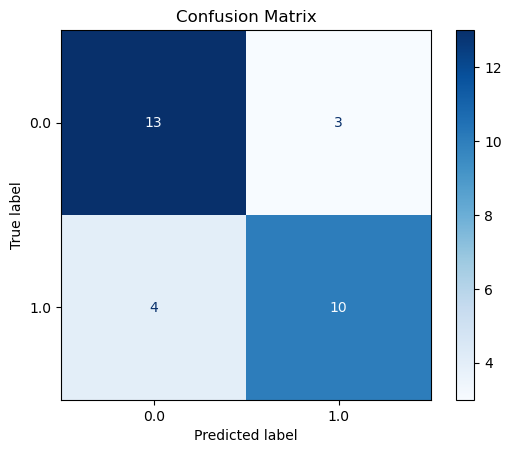

True Positive Rate: 0.7142857142857143
False Positive Rate: 0.1875


In [38]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
# Add a title and show the plot
tn, fp, fn, tp = conf_matrix.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print(f"True Positive Rate: {tpr}")
print(f"False Positive Rate: {fpr}")

Decision Tree Test Accuracy: 0.8166666666666667
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.81      0.82        31
         1.0       0.80      0.83      0.81        29

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



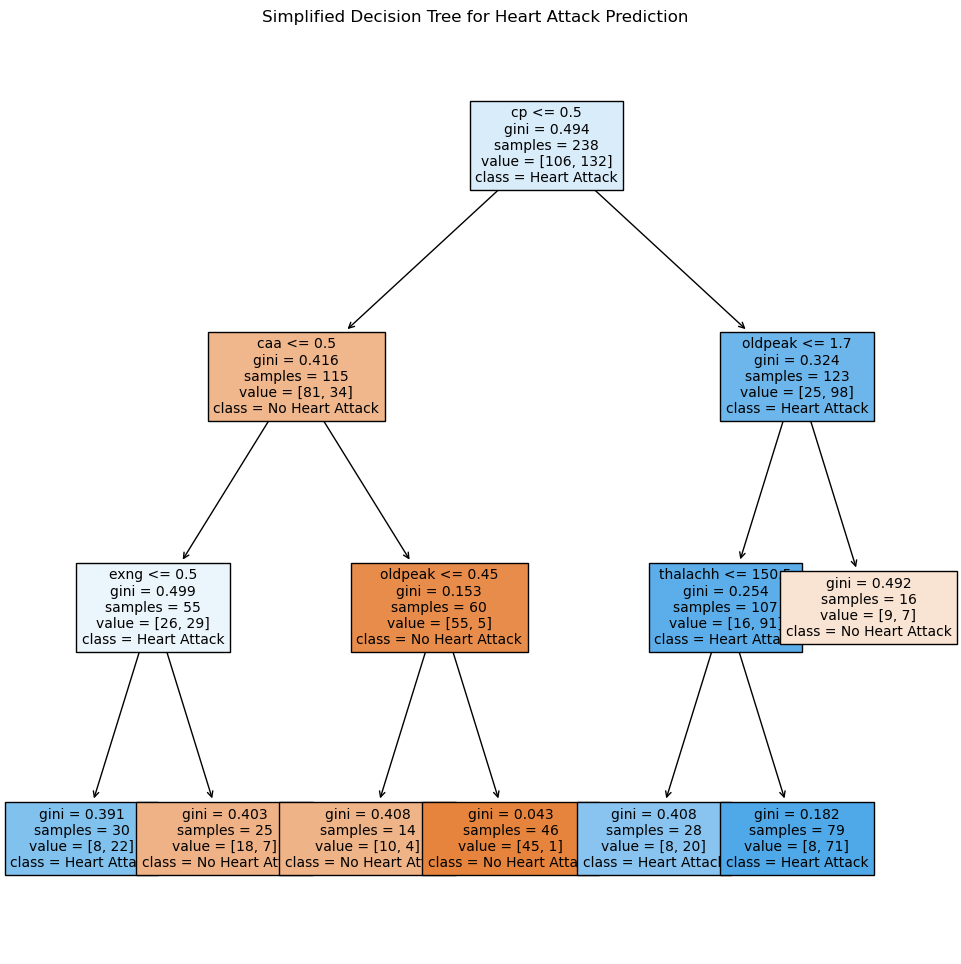

In [50]:
# Split the data into features and target
X = df.drop('output', axis=1)  # 'output' is the column to predict
y = df['output']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection
selector = SelectKBest(chi2, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Initialize the Decision Tree Classifier with parameters to limit depth and leaf size
tree = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=10)

# Train the model on selected features
tree.fit(X_train_selected, y_train)

# Predicting the test set results
y_pred = tree.predict(X_test_selected)

# Model Evaluation
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Extract the selected feature names for visualization
selected_features = [X.columns[i] for i in selector.get_support(indices=True)]

# Plot the decision tree
plt.figure(figsize=(12,12))
plot_tree(tree, filled=True, feature_names=selected_features, class_names=['No Heart Attack', 'Heart Attack'], fontsize=10)
plt.title('Simplified Decision Tree for Heart Attack Prediction')
plt.show()

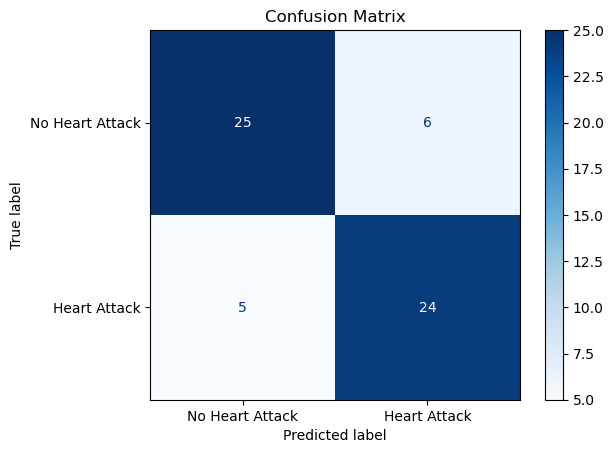

True Positive Rate: 0.8275862068965517
False Positive Rate: 0.1935483870967742


In [40]:
cm = confusion_matrix(y_test, y_pred)

# Create the confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Attack', 'Heart Attack'])

# Use the plot function with a colormap
disp.plot(cmap=plt.cm.Blues)

# Add a title and show the plot
plt.title('Confusion Matrix')
plt.show()
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print(f"True Positive Rate: {tpr}")
print(f"False Positive Rate: {fpr}")

Random Forest Test Accuracy: 0.8833333333333333
              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88        31
         1.0       0.82      0.97      0.89        29

    accuracy                           0.88        60
   macro avg       0.89      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60



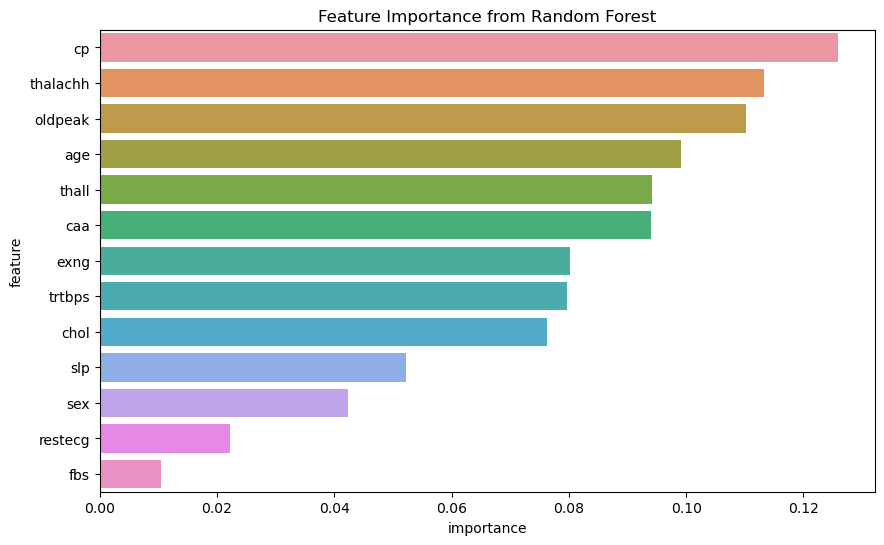

In [41]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=3)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature Importances
importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
importances = importances.sort_values('importance', ascending=False)

# Plotting Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importance from Random Forest')
plt.show()

In [42]:
from scipy.stats import ttest_ind

# Assuming 'output' is 1 for heart attacks and 0 for no heart attack
for factor in ['cp', 'caa', 'age', 'thall', 'oldpeak', 'chol', 'trtbps']:
    group1 = df[df['output'] == 1][factor]
    group2 = df[df['output'] == 0][factor]
    
    # Perform the t-test
    t_stat, p_val = ttest_ind(group1, group2)
    
    # Display the results
    print(f"T-test for {factor}:")
    print(f"T-statistic: {t_stat}, P-value: {p_val}")
    
    # Conclusion based on p-value
    if p_val < 0.05:
        print(f"There is a significant difference in {factor} between the groups.")
    else:
        print(f"There is no significant difference in {factor} between the groups.")
    print("\n")  # Newline for readability


T-test for cp:
T-statistic: 8.233840002202914, P-value: 5.872013759101554e-15
There is a significant difference in cp between the groups.


T-test for caa:
T-statistic: -7.999942604708125, P-value: 2.8383088261161766e-14
There is a significant difference in caa between the groups.


T-test for age:
T-statistic: -4.163128321553162, P-value: 4.1208198450644815e-05
There is a significant difference in age between the groups.


T-test for thall:
T-statistic: -6.28653033796572, P-value: 1.1609915738561966e-09
There is a significant difference in thall between the groups.


T-test for oldpeak:
T-statistic: -8.248085538002806, P-value: 5.329996177279472e-15
There is a significant difference in oldpeak between the groups.


T-test for chol:
T-statistic: -1.4918670691152507, P-value: 0.13679897728504054
There is no significant difference in chol between the groups.


T-test for trtbps:
T-statistic: -2.549100719915259, P-value: 0.011304629908857368
There is a significant difference in trtbps bet

##### Confusion Matrix

### Logistic Regression Hyperparameter Tuning

In [43]:
lr = LogisticRegression()
lr

LogisticRegression()

In [44]:
penalty = ["l1", "l2"]

parameters = {"penalty":penalty}

In [45]:
lr_searcher = GridSearchCV(lr, parameters)

In [46]:
lr_searcher.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [47]:
print("Best parameters: ",lr_searcher.best_params_)

Best parameters:  {'penalty': 'l2'}


In [48]:
y_pred = lr_searcher.predict(X_test)

In [49]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.9


<a id="15"></a>
## Conclusion
* Lets make a practise now!
* You can make different analyzes to reinforce what you have learned.